In [1]:
import re                                                # for cleaning our tweets
import nltk                                           # for removing stopwords
from textblob import TextBlob                           # for sentiment analysis
import matplotlib.pyplot as plt
from wordcloud import WordCloud                         #for plotting word cloud
import pandas as pd

In [2]:
data = pd.read_json('Musical_Instruments_5.json.zip',lines=True)

In [3]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


## Data Understanding

In [4]:
data.shape

(10261, 9)

In [5]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

### There are 27 null-values in the reviewer name column. So, I am going to drop this column 

In [6]:
data.drop(columns=['reviewerName'],axis=1,inplace=True)

In [7]:
data.isnull().sum()

reviewerID        0
asin              0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [8]:
data.dtypes

reviewerID        object
asin              object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

## Generating subjectivity and Polarity based on review summary 

In [9]:
# function for subjectivity
def calc_subj(summ):
    return TextBlob(summ).sentiment.subjectivity

# function for Polarity
def calc_pola(summ):
    return TextBlob(summ).sentiment.polarity
 
data['Subjectivity_summary'] = data.summary.apply(calc_subj)
data['Polarity_summary'] = data.summary.apply(calc_pola)

In [10]:
data

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Subjectivity_summary,Polarity_summary
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.6,0.700000
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.0,0.000000
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.0,0.000000
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.6,0.700000
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.5,-0.250000
...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.0,0.000000
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.4,0.283333
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.6,0.700000
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.0,0.000000


## Generating Subjectivity and polarity based on reviews

In [12]:
# function for subjectivity
def calc_sub1(rev):
    return TextBlob(rev).sentiment.subjectivity

# function for Polarity
def calc_pola1(rev):
    return TextBlob(rev).sentiment.polarity
 
data['Subjectivity_review'] = data.reviewText.apply(calc_sub1)
data['Polarity_review'] = data.reviewText.apply(calc_pola1)

In [13]:
data

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Subjectivity_summary,Polarity_summary,Subjectivity_review,Polarity_review
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.6,0.700000,0.398611,0.250000
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.0,0.000000,0.394444,0.052778
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.0,0.000000,0.434286,0.167500
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.6,0.700000,0.925000,0.200000
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.5,-0.250000,0.750000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.0,0.000000,0.575000,0.350000
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.4,0.283333,0.464348,0.188033
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.6,0.700000,0.401459,0.197768
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.0,0.000000,0.535669,0.153843


## Classifying the sentiments based on summary 

In [14]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
data['Sentiment_summary'] = data.Polarity_summary.apply(sentiment)

In [15]:
data

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Subjectivity_summary,Polarity_summary,Subjectivity_review,Polarity_review,Sentiment_summary
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.6,0.700000,0.398611,0.250000,Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.0,0.000000,0.394444,0.052778,Netural
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.0,0.000000,0.434286,0.167500,Netural
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.6,0.700000,0.925000,0.200000,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.5,-0.250000,0.750000,0.800000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.0,0.000000,0.575000,0.350000,Netural
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.4,0.283333,0.464348,0.188033,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.6,0.700000,0.401459,0.197768,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.0,0.000000,0.535669,0.153843,Netural


## Classifying the sentiments based on review

In [16]:
def sentiment1(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
data['Sentiment_review'] = data.Polarity_review.apply(sentiment)

In [17]:
data

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Subjectivity_summary,Polarity_summary,Subjectivity_review,Polarity_review,Sentiment_summary,Sentiment_review
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.6,0.700000,0.398611,0.250000,Positive,Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.0,0.000000,0.394444,0.052778,Netural,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.0,0.000000,0.434286,0.167500,Netural,Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.6,0.700000,0.925000,0.200000,Positive,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.5,-0.250000,0.750000,0.800000,Negative,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.0,0.000000,0.575000,0.350000,Netural,Positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.4,0.283333,0.464348,0.188033,Positive,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.6,0.700000,0.401459,0.197768,Positive,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.0,0.000000,0.535669,0.153843,Netural,Positive


## Visualizing the counts of different sentiments

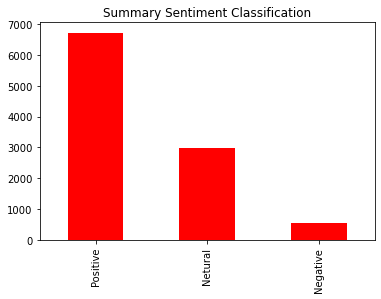

In [18]:
# let's see how many ratio of sentiment
data.Sentiment_summary.value_counts().plot(kind='bar', color='red')
plt.title('Summary Sentiment Classification')
plt.show()

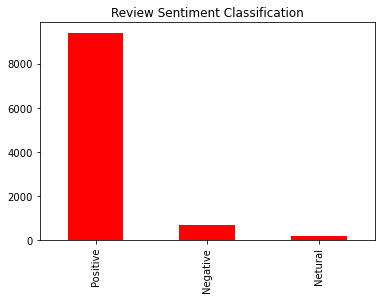

In [19]:
data.Sentiment_review.value_counts().plot(kind='bar', color='red')
plt.title('Review Sentiment Classification')
plt.show()

In [20]:
# let's see the percentage of different sentiment's class for summary 
 
# Creat
Df_sentiment = pd.DataFrame(data.Sentiment_summary.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = data.Sentiment_summary.value_counts()

Df_sentiment

,Sentiment_summary,Total
Positive,65.500439,6721
Netural,29.061495,2982
Negative,5.438066,558


In [21]:
# let's see the percentage of different sentiment's class for review
 
# Creat
Df_sentiment = pd.DataFrame(data.Sentiment_review.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = data.Sentiment_review.value_counts()

Df_sentiment

,Sentiment_review,Total
Positive,91.647988,9404
Negative,6.558815,673
Netural,1.793198,184


### From the above two tables we can see that more than 50% of the reviews are positive for both the review summary and reviews.Hence, we can conclude that the customers are happy with the product. 

## Plotting wordcloud

#### Wordcloud is very effective technique to understand the most relevant and frequent words. We can check which words are most frequently occuring words in Elon musk tweets

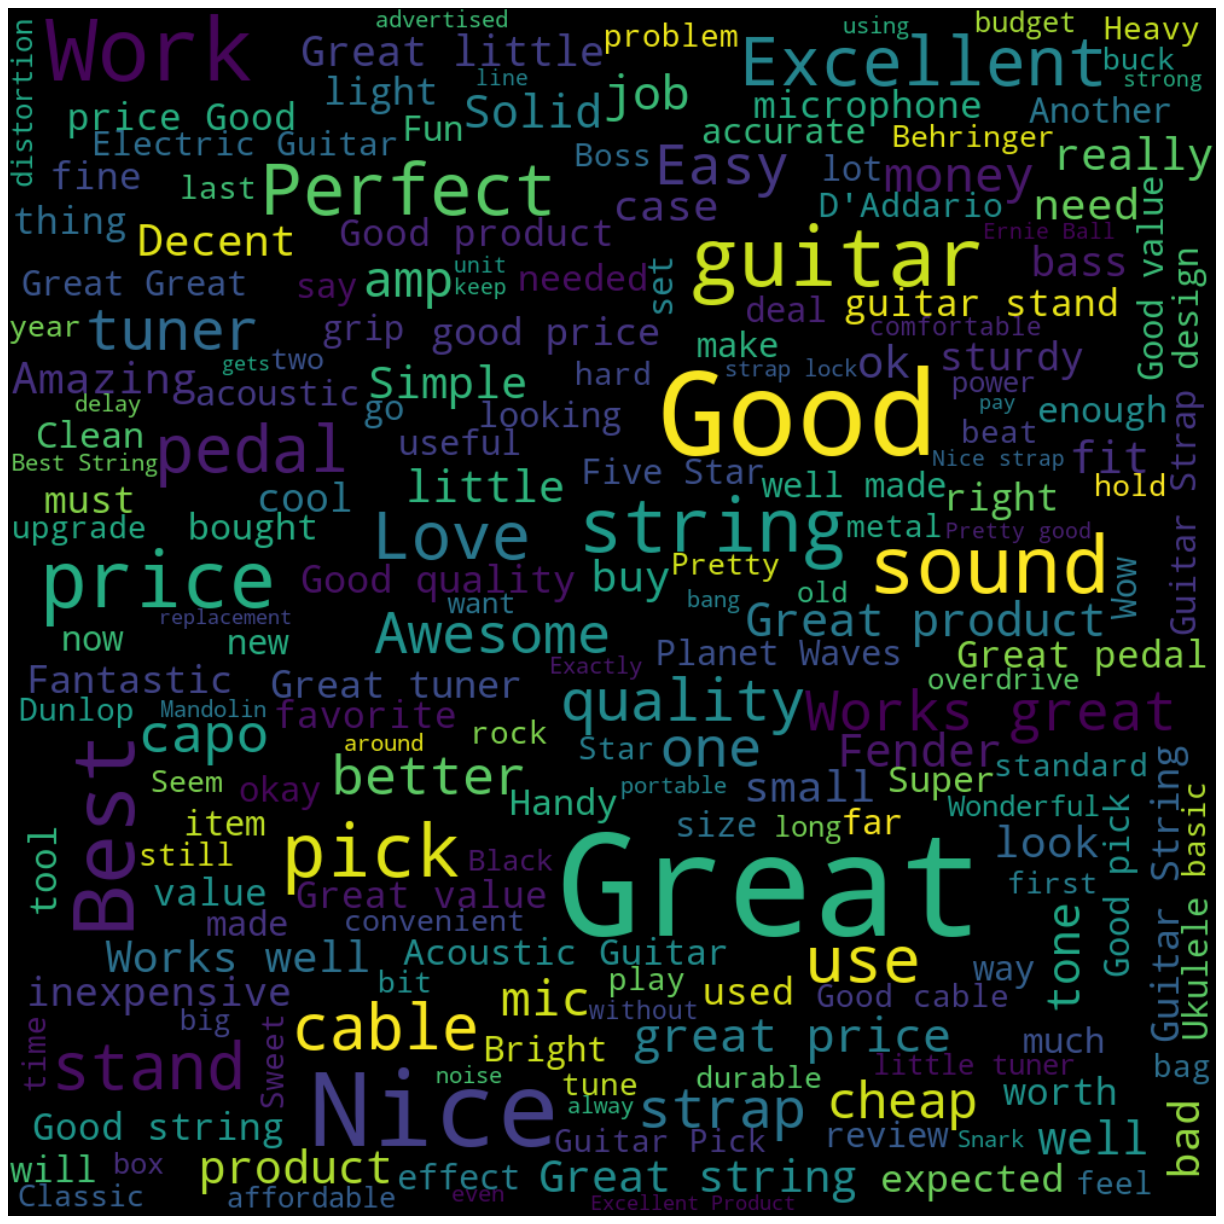

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in data["summary"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### from the above wordcount   plot for summary we can see that the most frequent used words are great,nice,good and excellent which represents that customers were mostly happy 

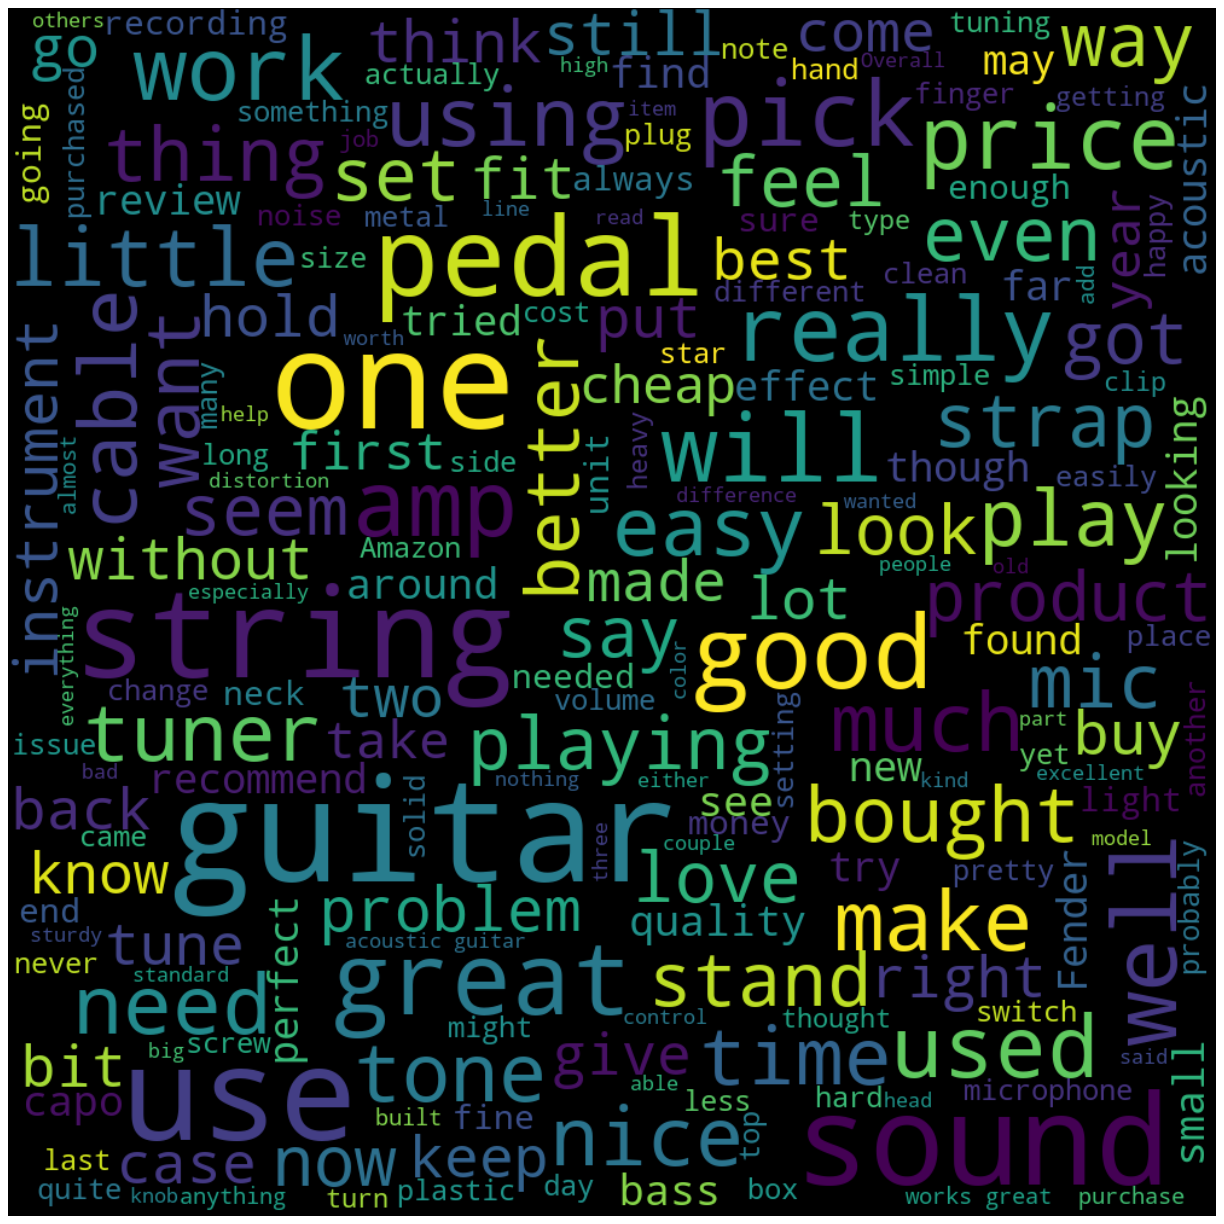

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in data["reviewText"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### from the above word plot count for review shows that good and nice are mostly used words which shows that customers were happy. 